## Librerias

In [566]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

import warnings
warnings.filterwarnings('ignore')

## Datos

In [567]:
datos = pd.read_csv(r'E:\Ciencia de Datos\Primer Parcial\Used Car Dataset Ramiro.csv')
datos.head()
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1503 non-null   int64  
 1   car_name            1503 non-null   object 
 2   registration_year   1503 non-null   object 
 3   insurance_validity  1503 non-null   object 
 4   fuel_type           1503 non-null   object 
 5   seats               1503 non-null   int64  
 6   kms_driven          1503 non-null   int64  
 7   ownsership          1503 non-null   object 
 8   transmission        1503 non-null   object 
 9   manufacturing_year  1503 non-null   int64  
 10  mileage(kmpl)       1500 non-null   float64
 11  engine(cc)          1500 non-null   float64
 12  max_power(bhp)      1500 non-null   float64
 13  torque(Nm)          1499 non-null   float64
 14  price(in lakhs)     1503 non-null   float64
dtypes: float64(5), int64(4), object(6)
memory usage: 176.3+

## Elimnamos columnas que no nos interesan

In [568]:
datos.columns

Index(['Unnamed: 0', 'car_name', 'registration_year', 'insurance_validity',
       'fuel_type', 'seats', 'kms_driven', 'ownsership', 'transmission',
       'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)', 'price(in lakhs)'],
      dtype='object')

#### Eliminamos la Columna 'car_name', 'registration_year', 'insurance_validity' no nos aporta valor para predecir el valor del precio de un usado en un mercado futuro de autos el 'modelo del auto'. El 'año de registro' es reduntante con el 'año de fabricacion'. El 'tipo de seguro' es un dato que no influye en la formacion del precio del auto. Estas eliminaciones son segun mi criterio personal.

In [569]:
df = datos.drop(columns=['Unnamed: 0','car_name','registration_year','insurance_validity'])
df.head()

,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


## Analisis exploratorio de los datos

In [570]:
df.info()
print("\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuel_type           1503 non-null   object 
 1   seats               1503 non-null   int64  
 2   kms_driven          1503 non-null   int64  
 3   ownsership          1503 non-null   object 
 4   transmission        1503 non-null   object 
 5   manufacturing_year  1503 non-null   int64  
 6   mileage(kmpl)       1500 non-null   float64
 7   engine(cc)          1500 non-null   float64
 8   max_power(bhp)      1500 non-null   float64
 9   torque(Nm)          1499 non-null   float64
 10  price(in lakhs)     1503 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 129.3+ KB

 fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            

## Eliminamos filas con datos faltantes de nuestro dataframe

In [571]:
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuel_type           1499 non-null   object 
 1   seats               1499 non-null   int64  
 2   kms_driven          1499 non-null   int64  
 3   ownsership          1499 non-null   object 
 4   transmission        1499 non-null   object 
 5   manufacturing_year  1499 non-null   int64  
 6   mileage(kmpl)       1499 non-null   float64
 7   engine(cc)          1499 non-null   float64
 8   max_power(bhp)      1499 non-null   float64
 9   torque(Nm)          1499 non-null   float64
 10  price(in lakhs)     1499 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 128.9+ KB


# Buscar filas duplicadas en el DataFrame.

In [572]:
duplicados_unicos = df.duplicated().sum()
print(f"Duplicados unicos: {duplicados_unicos}")

Duplicados unicos: 396


In [573]:
df.drop_duplicates(keep='first', inplace=True)
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuel_type           1103 non-null   object 
 1   seats               1103 non-null   int64  
 2   kms_driven          1103 non-null   int64  
 3   ownsership          1103 non-null   object 
 4   transmission        1103 non-null   object 
 5   manufacturing_year  1103 non-null   int64  
 6   mileage(kmpl)       1103 non-null   float64
 7   engine(cc)          1103 non-null   float64
 8   max_power(bhp)      1103 non-null   float64
 9   torque(Nm)          1103 non-null   float64
 10  price(in lakhs)     1103 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 94.9+ KB


In [574]:
duplicados_unicos = df.duplicated().sum()
print(f"Duplicados unicos: {duplicados_unicos}")

print("\n", df.isnull().sum())

Duplicados unicos: 0

 fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         0
engine(cc)            0
max_power(bhp)        0
torque(Nm)            0
price(in lakhs)       0
dtype: int64


Renombramos variables para mayor claridad y pasamos de lakhs a $USD.
1 lakh equivale a 100.000 rupias indias. 1 rupia india equivalen a 0.012 $USD.

In [575]:
price_lakh_rupia = 1 * 100000
price_rupia_dolar = 1 * 0.012
df['precio_usd'] = df['price(in lakhs)'] * price_lakh_rupia * price_rupia_dolar
df['precio_usd'] = df['precio_usd'].round().reindex()
df = df.drop(columns=['price(in lakhs)'])

print(df['precio_usd'].describe())

df.head()

count    1.103000e+03
mean     1.958874e+05
std      4.261254e+06
min      1.200000e+03
25%      5.400000e+03
50%      8.100000e+03
75%      1.676400e+04
max      1.140000e+08
Name: precio_usd, dtype: float64


,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),precio_usd
0,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,76500.0
1,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,10788.0
2,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,28500.0
3,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,16272.0
4,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,28800.0


In [576]:
precio_outliers = df[(df['precio_usd'] >= 84000000)]['precio_usd'].count()
print(f"Cantidad de outliers segun criterio propio para precio: {precio_outliers}")

lim_inf = df['precio_usd'].quantile(0.01)
lim_sup = df['precio_usd'].quantile(0.99)
precio_outliers_lim = df[(df['precio_usd'] < lim_inf) | (df['precio_usd'] > lim_sup)]['precio_usd'].count()
print(f"Cantidad de outliers en precio 0.01/0.99: {precio_outliers_lim}")

Q1 = df['precio_usd'].quantile(0.25)
Q3 = df['precio_usd'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.0 * IQR  # Factor 1.0 en lugar de 1.5
limite_superior = Q3 + 1.0 * IQR
precio_outliers_iqr = df[(df['precio_usd'] < limite_inferior) | (df['precio_usd'] > limite_superior)]['precio_usd'].count()
print(f"Cantidad de outliers en precio IQR: {precio_outliers_iqr}")


Cantidad de outliers segun criterio propio para precio: 2
Cantidad de outliers en precio 0.01/0.99: 24
Cantidad de outliers en precio IQR: 181


## Eliminamos los outliers de que pertenecen a 'precio_usd'.

In [577]:
# Crear DataFrame limpio
df_clean_price = df[df['precio_usd'].between(limite_inferior, limite_superior)].copy()

# Verificar resultados
print("Antes de la limpieza:", len(df))
print("Después de la limpieza:", len(df_clean_price))
print("\nEstadísticas de precio_usd después de la limpieza:")
print(df_clean_price['precio_usd'].describe())

Antes de la limpieza: 1103
Después de la limpieza: 922

Estadísticas de precio_usd después de la limpieza:
count      922.000000
mean      8611.626898
std       5421.618911
min       1200.000000
25%       4959.000000
50%       7062.000000
75%      10371.000000
max      27540.000000
Name: precio_usd, dtype: float64


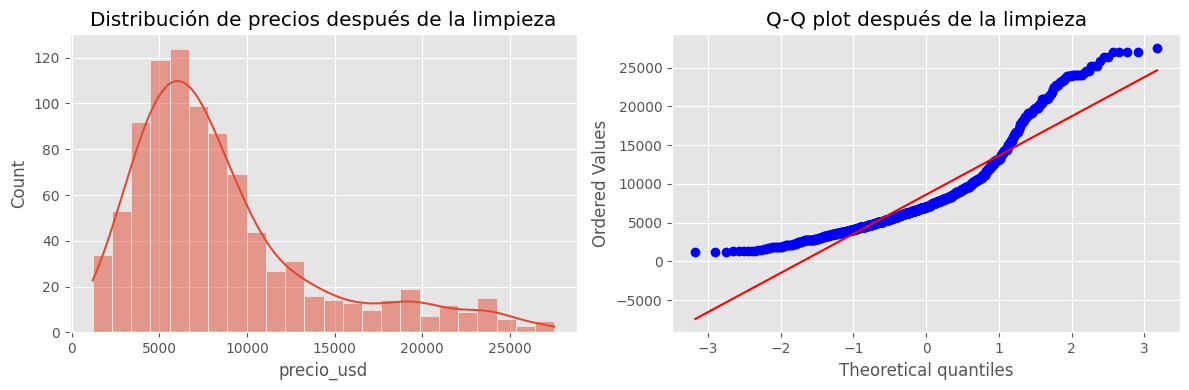

In [578]:
import seaborn as sns
import scipy.stats as stats

# Visualizar nueva distribución
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.histplot(df_clean_price['precio_usd'], kde=True)
plt.title('Distribución de precios después de la limpieza')

plt.subplot(122)
stats.probplot(df_clean_price['precio_usd'], dist="norm", plot=plt)
plt.title('Q-Q plot después de la limpieza')
plt.tight_layout()
plt.show()

In [579]:
# Transformación logarítmica
df['log_precio'] = np.log(df['precio_usd'])

# Luego aplicar la limpieza de outliers sobre log_precio
lim_inf = df['log_precio'].quantile(0.025)
lim_sup = df['log_precio'].quantile(0.975)
df_clean = df[df['log_precio'].between(lim_inf, lim_sup)].copy()

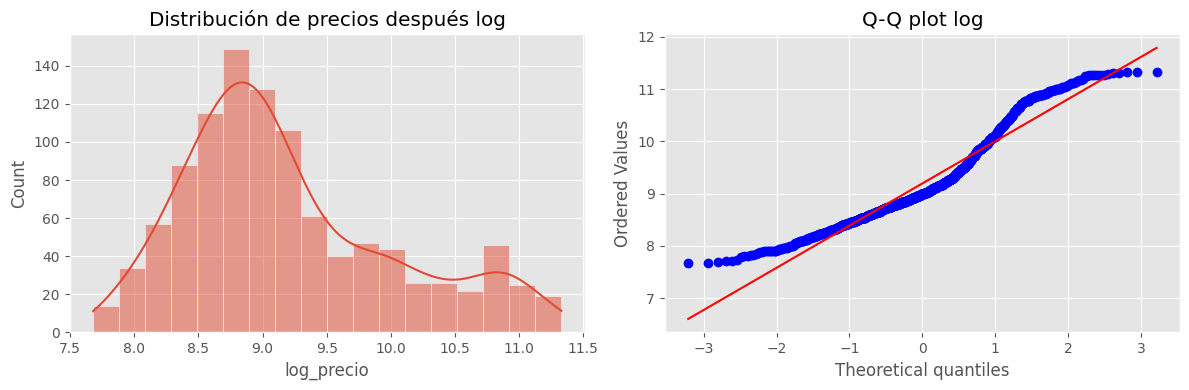

In [580]:
# Visualizar nueva distribución
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.histplot(df_clean['log_precio'], kde=True)
plt.title('Distribución de precios después log')

plt.subplot(122)
stats.probplot(df_clean['log_precio'], dist="norm", plot=plt)
plt.title('Q-Q plot log')
plt.tight_layout()
plt.show()

## Dado que mejora la distribucion del precio aplicamos una conversion logaritmica al 'precio_usd'.

# Eliminanmos del df los registros que pertenecen a los outliers 'precio_usd' y 'log_precio'.

In [581]:
df = df_clean.copy()
df = df.reset_index(drop=True)

print("Registros después de eliminar outliers de precio_usd y log_precio:", len(df))
print(df['precio_usd'].describe())

Registros después de eliminar outliers de precio_usd y log_precio: 1047
count     1047.000000
mean     14760.217765
std      16220.705920
min       2160.000000
25%       5520.000000
50%       8100.000000
75%      15768.000000
max      83400.000000
Name: precio_usd, dtype: float64


### Renombramos nuestras variables para mejor lectura.

In [582]:
df.columns

Index(['fuel_type', 'seats', 'kms_driven', 'ownsership', 'transmission',
       'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)', 'precio_usd', 'log_precio'],
      dtype='object')

In [587]:
df.rename(columns={
    'fuel_type': 'combustible',
    'seats': 'asientos',
    'kms_driven': 'kms_conducidos', 
    'ownsership': 'dueño',
    'transmission': 'caja_de_cambios',
    'manufacturing_year': 'año_fabricacion',
    'mileage(kmpl)': 'consumo_km_litro',
    'engine(cc)': 'motor_cc',
    'max_power(bhp)': 'potencia_bhp',
    'torque(Nm)': 'torque_nm',
    'precio_usd': 'precio_usd',
    'log_precio': 'log_precio'
}, inplace=True)

df.head()

,combustible,asientos,kms_conducidos,dueño,caja_de_cambios,año_fabricacion,consumo_km_litro,motor_cc,potencia_bhp,torque_nm,precio_usd,log_precio
0,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,76500.0,11.245046
1,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,10788.0,9.286190
2,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,28500.0,10.257659
3,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,16272.0,9.697201
4,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,28800.0,10.268131


## Variables numéricas independientes

## Aplicamos una limpieza de outliers para nuestras variables cuantitativas.

In [607]:
print("Valores únicos en año_fabricacion:", df['año_fabricacion'].unique())
print("\nValores únicos en asientos:", df['asientos'].unique())

outliers_kilometros_max = df['kms_conducidos'].nlargest(10)
outliers_kilometros_min = df['kms_conducidos'].nsmallest(10)
print("\nOutliers máximos en kms_conducidos:")
print(outliers_kilometros_max)
print("\nOutliers mínimos en kms_conducidos:")
print(outliers_kilometros_min)

outliers_km_por_litro_max = df['consumo_km_litro'].nlargest(10)
outliers_km_por_litro_min = df['consumo_km_litro'].nsmallest(10)
print("\nOutliers máximos en consumo_km_litro:")
print(outliers_km_por_litro_max)
print("\nOutliers mínimos en consumo_km_litro:")
print(outliers_km_por_litro_min)

outliers_motor_cc_max = df['motor_cc'].nlargest(10)
outliers_motor_cc_min = df['motor_cc'].nsmallest(10)
print("\nOutliers máximos en motor_cc:")
print(outliers_motor_cc_max)
print("\nOutliers mínimos en motor_cc:")
print(outliers_motor_cc_min)

outliers_potencia_bhp_max = df['potencia_bhp'].nlargest(10)
outliers_potencia_bhp_min = df['potencia_bhp'].nsmallest(10)
print("\nOutliers máximos en potencia_bhp:")
print(outliers_potencia_bhp_max)
print("\nOutliers mínimos en potencia_bhp:")
print(outliers_potencia_bhp_min)

outliers_torque_nm_max = df['torque_nm'].nlargest(10)
outliers_torque_nm_min = df['torque_nm'].nsmallest(10)
print("\nOutliers máximos en torque_nm:")
print(outliers_torque_nm_max)
print("\nOutliers mínimos en torque_nm:")
print(outliers_torque_nm_min)

Valores únicos en año_fabricacion: [2017 2020 2018 2019 2015 2021 2014 2022 2010 2011 2023 2016 2009 2013
 2012]

Valores únicos en asientos: [5 6 7 4 8]

Outliers máximos en kms_conducidos:
657    810000
621    790000
931    260000
906    176000
241    154000
16     150000
458    150000
466    150000
435    145000
357    144234
Name: kms_conducidos, dtype: int64

Outliers mínimos en kms_conducidos:
254      620
457     1000
523     1000
844     1229
994     1800
1040    2300
298     3000
316     3600
268     4000
401     4000
Name: kms_conducidos, dtype: int64

Outliers máximos en consumo_km_litro:
821    3996.0
97     2996.0
496    2987.0
83     2755.0
461    2755.0
628    2198.0
59     2179.0
99     1999.0
293    1999.0
755    1999.0
Name: consumo_km_litro, dtype: float64

Outliers mínimos en consumo_km_litro:
0      7.81
321    7.81
737    7.81
298    8.13
317    8.13
512    8.13
195    9.17
229    9.43
239    9.43
308    9.70
Name: consumo_km_litro, dtype: float64

Outliers máximo

## Aplico un criteros particulares para cada variable cuantitativa, cada una presenta su particularidad. Para tratar de darle un distribucion normal y luego una posterior estandarizacion. Probe de manera manual eliminar datos especificos y sus respectivos registros pero a la hora de realizar el entrenamiento no logran pasar las pruebas estadisticas ya que hay varianza muy amplia para cada residuo. Por ende interpreto que una limpieza de outliers mas generica o estandarizada podria ayudar a la distribucion de mi datos sin ser demasiado agresiva y caer en un sesgo.

In [608]:
df_backup = df.copy()

def tratar_outliers(df):
    df_limpio = df.copy()
    
    # kms_conducidos: percentiles 10-90
    km_inf = df['kms_conducidos'].quantile(0.10)
    km_sup = df['kms_conducidos'].quantile(0.90)
    df_limpio['kms_conducidos'] = df_limpio['kms_conducidos'].clip(lower=km_inf, upper=km_sup)
    
    # consumo_km_litro: IQR con factor 2.0
    Q1 = df['consumo_km_litro'].quantile(0.25)
    Q3 = df['consumo_km_litro'].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 2.0 * IQR
    lim_sup = Q3 + 2.0 * IQR
    df_limpio['consumo_km_litro'] = df_limpio['consumo_km_litro'].clip(lower=lim_inf, upper=lim_sup)
    
    # motor_cc: percentiles 5-95
    cc_inf = df['motor_cc'].quantile(0.05)
    cc_sup = df['motor_cc'].quantile(0.95)
    df_limpio['motor_cc'] = df_limpio['motor_cc'].clip(lower=cc_inf, upper=cc_sup)
    
    # potencia_bhp: percentiles 5-95
    pot_inf = df['potencia_bhp'].quantile(0.05)
    pot_sup = df['potencia_bhp'].quantile(0.95)
    df_limpio['potencia_bhp'] = df_limpio['potencia_bhp'].clip(lower=pot_inf, upper=pot_sup)
    
    # torque_nm: IQR estándar (1.5)
    Q1 = df['torque_nm'].quantile(0.25)
    Q3 = df['torque_nm'].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    df_limpio['torque_nm'] = df_limpio['torque_nm'].clip(lower=lim_inf, upper=lim_sup)
    
    return df_limpio

# Aplicar el tratamiento
df_clear = tratar_outliers(df)

## Transformaciones de las variables categóricas.

In [611]:
df_cat = df.select_dtypes(include=['object'])
df_cat_variantes = df_cat.nunique()
print(df_cat_variantes)


for col in df_cat.columns:
    print("\n", f"Columna: {col}")
    print(df_cat[col].unique())
    print("-" * 65)

combustible        3
dueño              4
caja_de_cambios    2
dtype: int64

 Columna: combustible
['Petrol' 'Diesel' 'CNG']
-----------------------------------------------------------------

 Columna: dueño
['First Owner' 'Second Owner' 'Third Owner' 'Fifth Owner']
-----------------------------------------------------------------

 Columna: caja_de_cambios
['Automatic' 'Manual']
-----------------------------------------------------------------


In [614]:
df['dueño'] = df['dueño'].replace({'Fifth Owner': 'Fourth Owner'})
df.head()

,combustible,asientos,kms_conducidos,dueño,caja_de_cambios,año_fabricacion,consumo_km_litro,motor_cc,potencia_bhp,torque_nm,precio_usd,log_precio
0,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,76500.0,11.245046
1,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,10788.0,9.286190
2,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,28500.0,10.257659
3,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,16272.0,9.697201
4,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,28800.0,10.268131


In [633]:
#Variables categóricas y One Hot Encoding
df_cat = df_clear.select_dtypes(include=['object'])
df_cat['dueño'] = df_cat['dueño'].replace({'Fifth Owner': 'Fourth Owner'})
df_ohe = pd.get_dummies(df_cat, drop_first=True)

print(df_ohe.columns)
# Correlación entre variables dummies
print('\n',df_ohe.corr())

Index(['combustible_Diesel', 'combustible_Petrol', 'dueño_Fourth Owner',
       'dueño_Second Owner', 'dueño_Third Owner', 'caja_de_cambios_Manual'],
      dtype='object')

                         combustible_Diesel  combustible_Petrol  \
combustible_Diesel                1.000000           -0.965853   
combustible_Petrol               -0.965853            1.000000   
dueño_Fourth Owner               -0.021162            0.021910   
dueño_Second Owner                0.093428           -0.090126   
dueño_Third Owner                 0.045207           -0.040894   
caja_de_cambios_Manual           -0.210534            0.181552   

                        dueño_Fourth Owner  dueño_Second Owner  \
combustible_Diesel               -0.021162            0.093428   
combustible_Petrol                0.021910           -0.090126   
dueño_Fourth Owner                1.000000           -0.012938   
dueño_Second Owner               -0.012938            1.000000   
dueño_Third Owner                

## Correlación entre variables cuantitativas

In [634]:
df_cuant = df_clear.select_dtypes(include=['int64', 'float64']).drop(columns=['precio_usd', 'log_precio'])
df_cuant.head()

,asientos,kms_conducidos,año_fabricacion,consumo_km_litro,motor_cc,potencia_bhp,torque_nm
0,5,56000.0,2017,7.81,2996.0,2996.0,333.0
1,5,30615.0,2020,17.40,999.0,999.0,9863.0
2,5,24000.0,2018,20.68,1995.0,1995.0,188.0
3,5,18378.0,2019,16.50,1353.0,1353.0,13808.0
4,5,44900.0,2019,14.67,1798.0,1798.0,17746.0


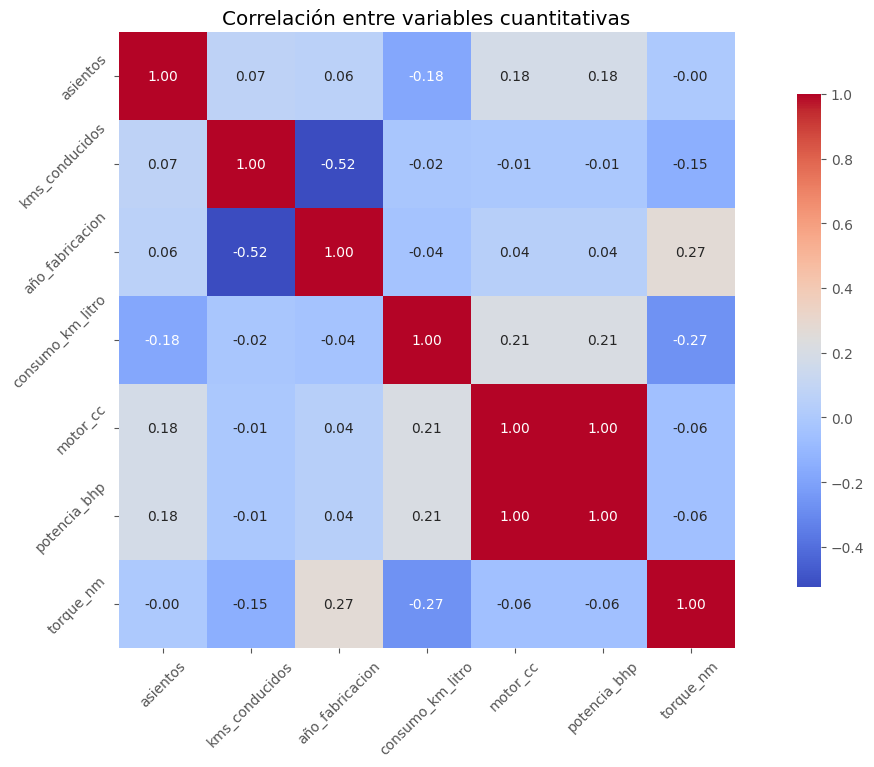

In [635]:
df_cuant.corr().style.background_gradient(cmap='coolwarm').format(precision=2)
plt.figure(figsize=(16, 8))
sns.heatmap(df_cuant.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlación entre variables cuantitativas')
plt.xticks(rotation=45)  
plt.yticks(rotation=45) 
plt.show()


In [636]:
print(df[['motor_cc', 'potencia_bhp', 'precio_usd']].corr())

              motor_cc  potencia_bhp  precio_usd
motor_cc      1.000000      1.000000    0.017612
potencia_bhp  1.000000      1.000000    0.017612
precio_usd    0.017612      0.017612    1.000000


In [637]:
df_cuant = df_cuant.drop(columns=['motor_cc'])
df_cuant.head()

,asientos,kms_conducidos,año_fabricacion,consumo_km_litro,potencia_bhp,torque_nm
0,5,56000.0,2017,7.81,2996.0,333.0
1,5,30615.0,2020,17.40,999.0,9863.0
2,5,24000.0,2018,20.68,1995.0,188.0
3,5,18378.0,2019,16.50,1353.0,13808.0
4,5,44900.0,2019,14.67,1798.0,17746.0


#### Si bien las dos tiene la misma correlacion con la varible dependiente('precio_usd'), obtamos por descartar 'motor_cc'.

# Estandarizamos df_cuant

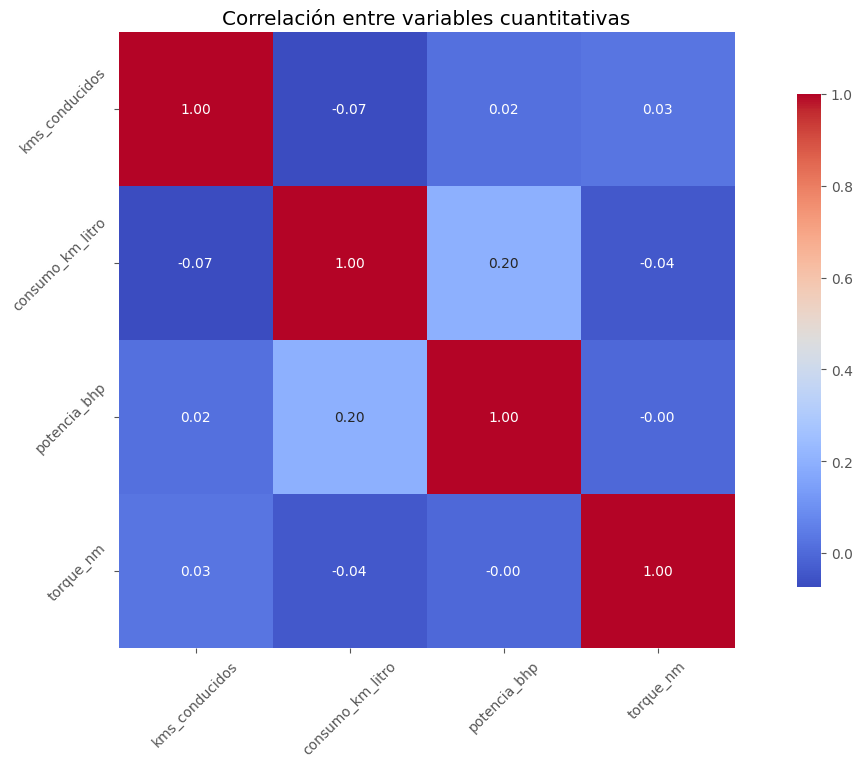

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['kms_conducidos', 'consumo_km_litro', 'potencia_bhp', 'torque_nm']])

df_scaled_df = pd.DataFrame(df_scaled, columns=['kms_conducidos', 'consumo_km_litro', 'potencia_bhp', 'torque_nm'])

df_scaled_df.corr().style.background_gradient(cmap='coolwarm').format(precision=2)
plt.figure(figsize=(16, 8))
sns.heatmap(df_scaled_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlación entre variables cuantitativas')
plt.xticks(rotation=45)  
plt.yticks(rotation=45) 
plt.show()

## Ajuste del modelo

In [644]:
df_final = pd.concat([df_scaled_df, df_ohe, df_clear[['precio_usd', 'log_precio']]], axis=1)

print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   kms_conducidos          1047 non-null   float64
 1   consumo_km_litro        1047 non-null   float64
 2   potencia_bhp            1047 non-null   float64
 3   torque_nm               1047 non-null   float64
 4   combustible_Diesel      1047 non-null   bool   
 5   combustible_Petrol      1047 non-null   bool   
 6   dueño_Fourth Owner      1047 non-null   bool   
 7   dueño_Second Owner      1047 non-null   bool   
 8   dueño_Third Owner       1047 non-null   bool   
 9   caja_de_cambios_Manual  1047 non-null   bool   
 10  precio_usd              1047 non-null   float64
 11  log_precio              1047 non-null   float64
dtypes: bool(6), float64(6)
memory usage: 55.3 KB
None


In [646]:
# Separar variables predictoras y target
X = df_final.drop(columns=['precio_usd','log_precio'])

# Convertir booleanos a int para evitar errores con statsmodels
X = X.astype(float)

y = df_final['log_precio']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=1234, shuffle=True
)

# Añadir constante para el modelo
X_train = sm.add_constant(X_train)

# Ajustar el modelo
modelo = sm.OLS(endog=y_train, exog=X_train).fit()

# Resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     95.19
Date:                Mon, 26 May 2025   Prob (F-statistic):          2.54e-121
Time:                        03:23:27   Log-Likelihood:                -734.61
No. Observations:                 837   AIC:                             1489.
Df Residuals:                     827   BIC:                             1537.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

## Eliminamos la variables que su p > 0.05 'consumo_km_litro', 'potencia_bhp', 'torque_nm', 'combustible_Petrol', 'dueño_Fourth Owner', 'dueño_Second Owner'.

In [647]:
# Eliminar las variables que son p > 0.05
X = X.drop(columns=[
    'consumo_km_litro',
    'potencia_bhp',
    'torque_nm',
    'combustible_Petrol',
    'dueño_Fourth Owner',
    'dueño_Second Owner'
])

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=1234, shuffle=True
)

# Añadir constante para el modelo
X_train = sm.add_constant(X_train)

# Ajustar el modelo nuevamente
modelo = sm.OLS(endog=y_train, exog=X_train).fit()

# Resumen del nuevo modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     214.0
Date:                Mon, 26 May 2025   Prob (F-statistic):          3.12e-126
Time:                        03:32:21   Log-Likelihood:                -736.03
No. Observations:                 837   AIC:                             1482.
Df Residuals:                     832   BIC:                             1506.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

## Diagnostico de residuos

In [649]:
# Predicciones y residuos en el set de entrenamiento
y_train_pred = modelo.predict(X_train)
residuos_train = y_train - y_train_pred

## Graficos

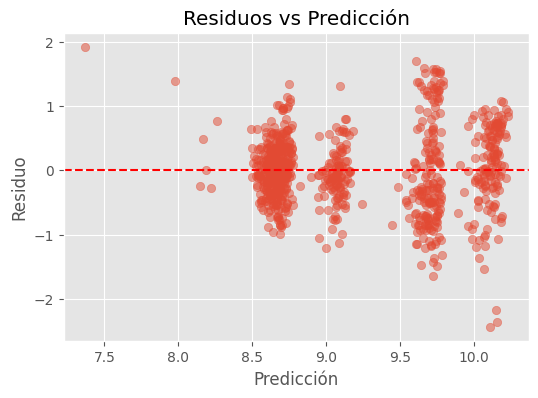

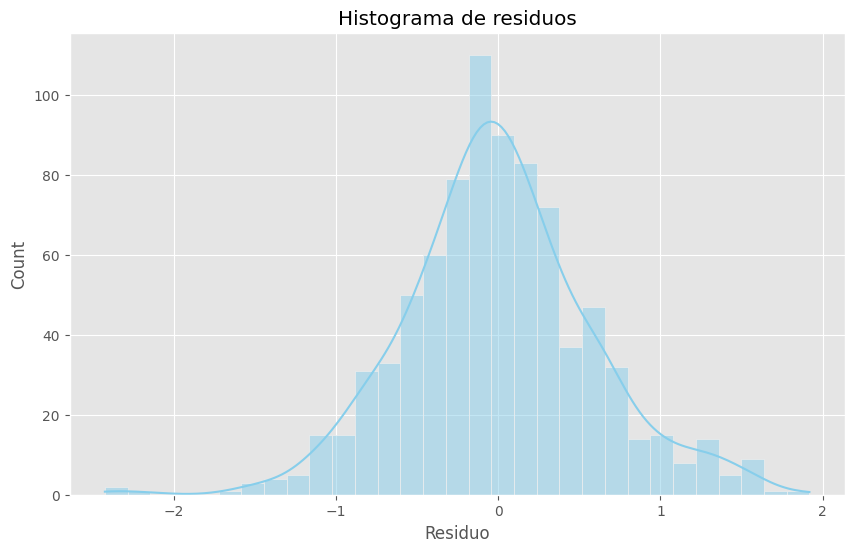

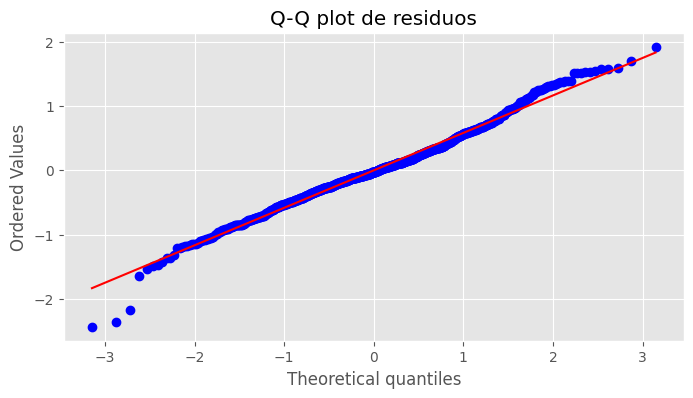

In [650]:
# 1. Gráfico de residuos vs predicción
plt.figure(figsize=(6,4))
plt.scatter(y_train_pred, residuos_train, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicción')
plt.ylabel('Residuo')
plt.title('Residuos vs Predicción')
plt.show()

# 2. Histograma de residuos
plt.figure(figsize=(10,6))
sns.histplot(residuos_train, kde=True, color='skyblue')
plt.title('Histograma de residuos')
plt.xlabel('Residuo')
plt.show()

# 3. Q-Q plot de residuos
import scipy.stats as stats
plt.figure(figsize=(8,4))
stats.probplot(residuos_train, dist="norm", plot=plt)
plt.title("Q-Q plot de residuos")
plt.show()

## **Test de Normalidad**

D'Agostino's K-squared test

Shapiro-Wilk test

Conclusión: Los residuos NO siguen una distribución normal

In [651]:
stat, p = stats.shapiro(residuos_train)
print(f"Shapiro-Wilk test: Estadístico= {stat:.4f}, p-value = {p:.4g}")

k2, p_value = stats.normaltest(residuos_train)
print(f"D'Agostino test: Estadítico= {k2}, p-value = {p_value}")

if p > 0.05:
    print("No se rechaza H0: los residuos parecen normales.")
else:
    print("Se rechaza H0: los residuos no parecen normales.")

Shapiro-Wilk test: Estadístico= 0.9887, p-value = 4.739e-06
D'Agostino test: Estadítico= 16.211746108348507, p-value = 0.00030176166099569676
Se rechaza H0: los residuos no parecen normales.


Shapiro-Wilk test: p-value = 4.739e-06 < 0.05

D'Agostino test: p-value = 0.00030176166099569676 < 0.05

## **Test de Heterocedasticidad**

Breusch-Pagan test

Conclusión: Hay evidencia de heterocedasticidad (varianza no constante)

Si el p-value del test de Breusch-Pagan es **mayor a 0.05**, los residuos tienen varianza constante (homocedasticidad).
Si son **menores a 0.05**, heterocedasticidad.

In [652]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuos_train, X_train)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

if bp_test[1] > 0.05:
    print("No se rechaza H0: No hay evidencia de heterocedasticidad (varianza constante).")
else:
    print("Se rechaza H0: Hay evidencia de heterocedasticidad (varianza no constante).")

{'Lagrange multiplier statistic': np.float64(122.38714023637102), 'p-value': np.float64(1.6508805739903214e-25), 'f-value': np.float64(35.622819854634834), 'f p-value': np.float64(1.7016056933269403e-27)}
Se rechaza H0: Hay evidencia de heterocedasticidad (varianza no constante).


Breusch-Pagan test: p-value = 1.70e-27 < 0.05

## Implementacion de modelo de erro mas robusto.

In [653]:
modelo_robusto = sm.OLS(y_train, X_train).fit(cov_type='HC3')
print(modelo_robusto.summary())

                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     198.6
Date:                Mon, 26 May 2025   Prob (F-statistic):          1.57e-119
Time:                        03:44:54   Log-Likelihood:                -736.03
No. Observations:                 837   AIC:                             1482.
Df Residuals:                     832   BIC:                             1506.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

# Ahora 'km_conducidos' no es significativo con HC3 como error. 

In [654]:
# Elimina la variable no significativa
X = X.drop(columns=['kms_conducidos'])

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=1234, shuffle=True
)

# Añadir constante
X_train = sm.add_constant(X_train)

# Ajustar modelo robusto
modelo_robusto = sm.OLS(y_train, X_train).fit(cov_type='HC3')
print(modelo_robusto.summary())

# Calcular residuos y volver a probar normalidad y heterocedasticidad
y_train_pred = modelo_robusto.predict(X_train)
residuos_train = y_train - y_train_pred

# Test de normalidad
from scipy import stats
stat, p = stats.shapiro(residuos_train)
print(f"Shapiro-Wilk test: Estadístico= {stat:.4f}, p-value = {p:.4g}")

k2, p_value = stats.normaltest(residuos_train)
print(f"D'Agostino test: Estadístico= {k2}, p-value = {p_value}")

# Test de heterocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuos_train, X_train)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 26 May 2025   Prob (F-statistic):          3.28e-115
Time:                        03:50:47   Log-Likelihood:                -749.28
No. Observations:                 837   AIC:                             1507.
Df Residuals:                     833   BIC:                             1525.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

## Predicciones


In [ ]:
# Predicciones en escala original (USD)
predicciones = modelo_robusto.get_prediction(exog=X_train).summary_frame(alpha=0.05).reset_index()

# Aplica la exponencial a las columnas relevantes
predicciones['prediccion_usd'] = np.exp(predicciones['mean'])
predicciones['ic_inf_usd'] = np.exp(predicciones['obs_ci_lower'])
predicciones['ic_sup_usd'] = np.exp(predicciones['obs_ci_upper'])

predicciones[['prediccion_usd', 'ic_inf_usd', 'ic_sup_usd']].head()

,prediccion_usd,ic_inf_usd,ic_sup_usd
0,5750.623708,1794.736838,18425.917560
1,8612.005396,2682.594068,27647.357393
2,16219.845088,5044.967555,52147.684166
3,24290.477090,7560.300795,78042.831004
4,5750.623708,1794.736838,18425.917560


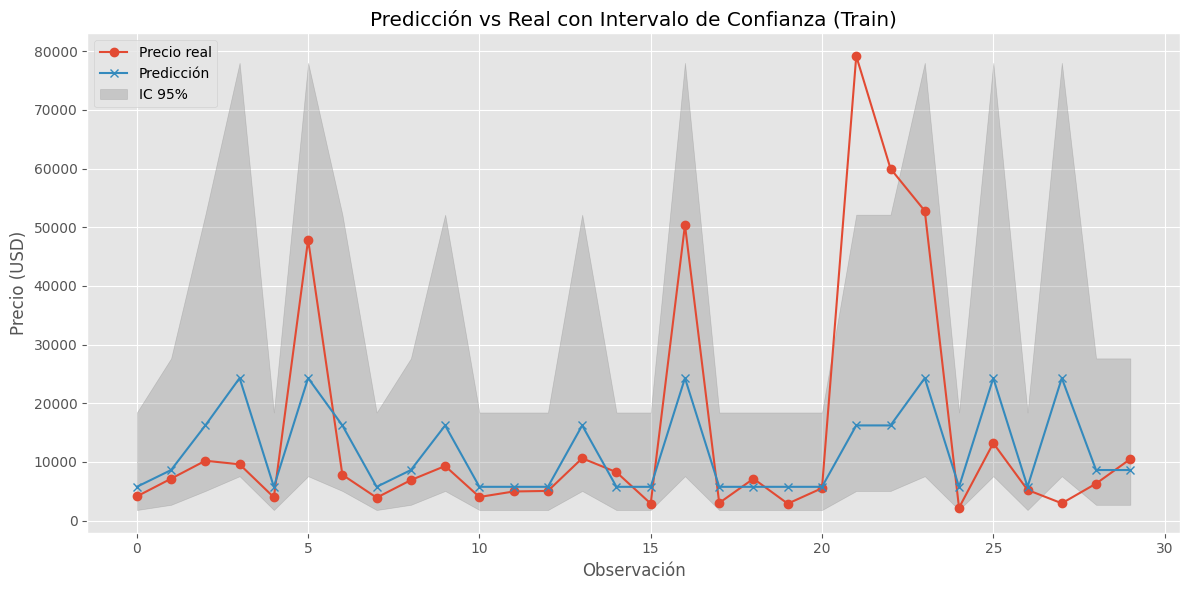

In [658]:
# Agrega los valores reales al DataFrame de predicciones
predicciones['precio_real_usd'] = np.exp(y_train.values)  # y_train está en log

# Selecciona las primeras 30 observaciones para graficar
n = 30
plt.figure(figsize=(12, 6))
plt.plot(predicciones['precio_real_usd'][:n], label='Precio real', marker='o')
plt.plot(predicciones['prediccion_usd'][:n], label='Predicción', marker='x')
plt.fill_between(
    predicciones.index[:n],
    predicciones['ic_inf_usd'][:n],
    predicciones['ic_sup_usd'][:n],
    color='gray', alpha=0.3, label='IC 95%'
)
plt.xlabel('Observación')
plt.ylabel('Precio (USD)')
plt.title('Predicción vs Real con Intervalo de Confianza (Train)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Predecir en el set de test
X_test = sm.add_constant(X_test, prepend=True)
y_pred_test = modelo_robusto.predict(X_test)

y_test_usd = np.exp(y_test)
y_pred_test_usd = np.exp(y_pred_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test_usd, y_pred_test_usd))
mae = mean_absolute_error(y_test_usd, y_pred_test_usd)
r2 = r2_score(y_test_usd, y_pred_test_usd)

print(f"RMSE test: {rmse:.2f}")
print(f"MAE test: {mae:.2f}")
print(f"R2 test: {r2:.3f}")

RMSE test: 13153.45
MAE test: 7257.22
R2 test: 0.331


Rango de precios en USD: 2160.00 - 83400.00


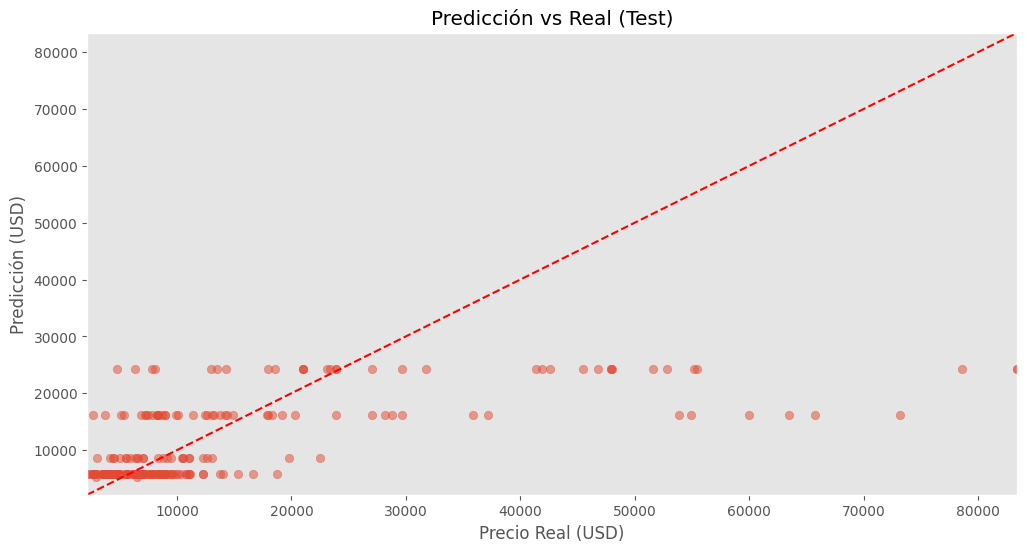

In [660]:
precio_min_max = df['precio_usd'].min(), df['precio_usd'].max()
print(f"Rango de precios en USD: {precio_min_max[0]:.2f} - {precio_min_max[1]:.2f}")
# Gráfico de predicciones vs reales en el set de test
plt.figure(figsize=(12, 6))
plt.scatter(y_test_usd, y_pred_test_usd, alpha=0.5)
plt.plot([precio_min_max[0], precio_min_max[1]], [precio_min_max[0], precio_min_max[1]], color='red', linestyle='--')
plt.xlabel('Precio Real (USD)')
plt.ylabel('Predicción (USD)')
plt.title('Predicción vs Real (Test)')
plt.xlim(precio_min_max)
plt.ylim(precio_min_max)
plt.grid()
plt.show()

## Conclusiones:  
El modelo predice con un error medio de U$D 7257.22. Para un rango de precios que va desde  U$D2160.00 a  U$D83400.00. En este punto puedo concluir que solo sirve para obtener un idea general del precio pero esta lejos de ser concluyente. Solo explica aproximadamnete 1/3 de la variavilidad de los precios. 

## Conclusiones:
ventas = 2.9004 + 0.0456 TV + 0.1904 Radio
La inversion en publicidad en tv y radio explican el 89.4% de las ventas.
La inversion en publicidad en tv y radio son significativas a la hora de explicar las variaciones en las ventas
El error del test es de 1.696. Las predicciones del modelo final se alejan 1.696 de los valores reales
La inversion en periodico por otro lado, no es significativa a la hora de explicar las ventas

## Interaccion entre predictores
Modelo Ampliado

In [667]:
# --- Crear variables de interacción lógicas adicionales ---

# 1. Consumo x Combustible Diesel
if 'combustible_Diesel' in X.columns and 'consumo_km_litro' in df_final.columns:
    X['diesel_consumo'] = X['combustible_Diesel'] * df_final['consumo_km_litro']

# 2. Kms recorridos x Combustible Diesel
if 'combustible_Diesel' in X.columns and 'kms_conducidos' in df_final.columns:
    X['diesel_kms'] = X['combustible_Diesel'] * df_final['kms_conducidos']

# 3. Potencia x Caja Manual
if 'caja_de_cambios_Manual' in X.columns and 'potencia_bhp' in df_final.columns:
    X['manual_potencia'] = X['caja_de_cambios_Manual'] * df_final['potencia_bhp']

# 4. Año de fabricación x Kms conducidos
if 'año_fabricacion' in df_final.columns and 'kms_conducidos' in df_final.columns:
    X['kms_año'] = df_final['año_fabricacion'] * df_final['kms_conducidos']


# 6. Consumo x Potencia
if 'consumo_km_litro' in df_final.columns and 'potencia_bhp' in df_final.columns:
    X['consumo_potencia'] = df_final['consumo_km_litro'] * df_final['potencia_bhp']

# 7. Tipo de dueño (Third Owner) x Año de fabricación
if 'dueño_Third Owner' in X.columns and 'año_fabricacion' in df_final.columns:
    X['año_tercer_dueño'] = df_final['año_fabricacion'] * X['dueño_Third Owner']

# 8. Tipo de caja x Año de fabricación
if 'caja_de_cambios_Manual' in X.columns and 'año_fabricacion' in df_final.columns:
    X['año_manual'] = df_final['año_fabricacion'] * X['caja_de_cambios_Manual']

# 9. Consumo x Tipo de caja
if 'caja_de_cambios_Manual' in X.columns and 'consumo_km_litro' in df_final.columns:
    X['consumo_manual'] = df_final['consumo_km_litro'] * X['caja_de_cambios_Manual']

# --- Ajustar modelo ampliado ---
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

# División en entrenamiento y prueba
X_train_int, X_test_int, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=1234, shuffle=True
)

X_train_int = sm.add_constant(X_train_int)
modelo_int = sm.OLS(y_train, X_train_int).fit(cov_type='HC3')

# --- Comparar con el modelo original ---
anova_results = anova_lm(modelo_robusto, modelo_int)
print(anova_results)

   df_resid         ssr  df_diff   ss_diff         F    Pr(>F)
0     833.0  293.636745      0.0       NaN       NaN       NaN
1     828.0  285.942280      5.0  7.694465  4.456156  0.000518


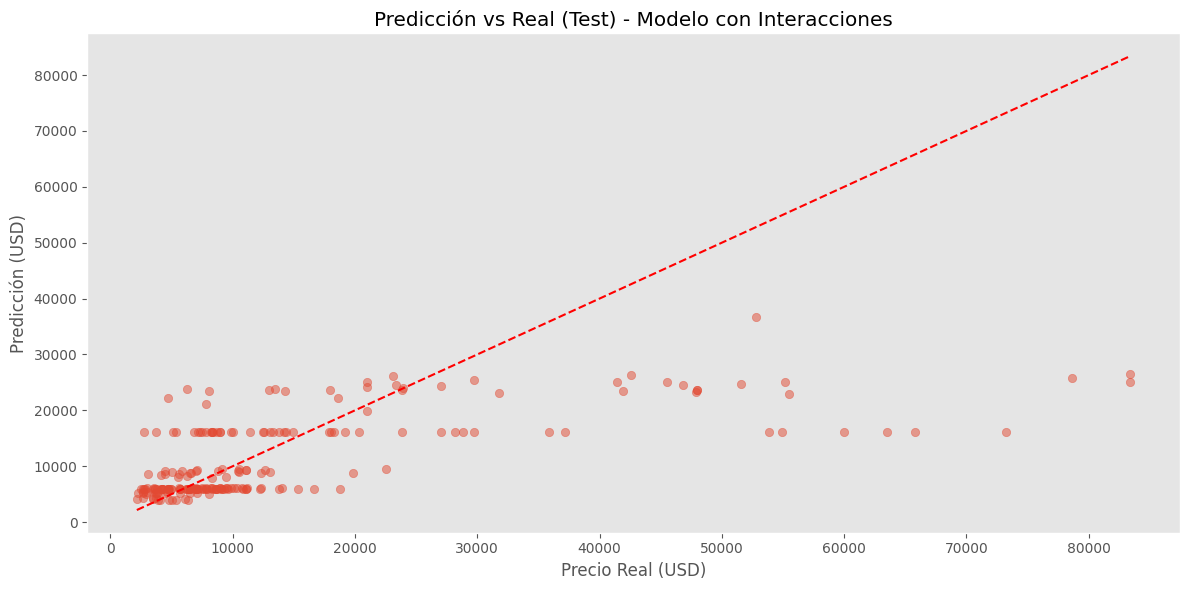

In [668]:
# Predicción en el set de test con el modelo ampliado
X_test_int = sm.add_constant(X_test_int, prepend=True)
y_pred_test_int = modelo_int.predict(X_test_int)

y_test_usd_int = np.exp(y_test)
y_pred_test_usd_int = np.exp(y_pred_test_int)

plt.figure(figsize=(12, 6))
plt.scatter(y_test_usd_int, y_pred_test_usd_int, alpha=0.5)
plt.plot([y_test_usd_int.min(), y_test_usd_int.max()],
         [y_test_usd_int.min(), y_test_usd_int.max()],
         color='red', linestyle='--')
plt.xlabel('Precio Real (USD)')
plt.ylabel('Predicción (USD)')
plt.title('Predicción vs Real (Test) - Modelo con Interacciones')
plt.grid()
plt.tight_layout()
plt.show()

In [669]:
# --- Comparación estadística de modelos ---

# 1. F-test ANOVA para comparar modelos
anova_results = anova_lm(modelo_robusto, modelo_int)
print("Comparación ANOVA (F-test) entre modelos:")
print(anova_results)

# 2. Métricas de desempeño en test
print("\n--- Métricas en el set de test ---")
print("Modelo original:")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE:  {mae:.2f}")
print(f"  R2:   {r2:.3f}")

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular métricas para el modelo ampliado (con interacciones)
rmse_int = np.sqrt(mean_squared_error(y_test_usd_int, y_pred_test_usd_int))
mae_int = mean_absolute_error(y_test_usd_int, y_pred_test_usd_int)
r2_int = r2_score(y_test_usd_int, y_pred_test_usd_int)

print("\nModelo ampliado (con interacciones):")
print(f"  RMSE: {rmse_int:.2f}")
print(f"  MAE:  {mae_int:.2f}")
print(f"  R2:   {r2_int:.3f}")

Comparación ANOVA (F-test) entre modelos:
   df_resid         ssr  df_diff   ss_diff         F    Pr(>F)
0     833.0  293.636745      0.0       NaN       NaN       NaN
1     828.0  285.942280      5.0  7.694465  4.456156  0.000518

--- Métricas en el set de test ---
Modelo original:
  RMSE: 13153.45
  MAE:  7257.22
  R2:   0.331

Modelo ampliado (con interacciones):
  RMSE: 12892.31
  MAE:  7029.06
  R2:   0.357


### Podemos concluir que el modelo con interacciones es mejor ya reduce el error significativamente en comparacion a nuestro modelo robusto. Valores más bajos de error y mayor R² indican una mejora en el desempeño del modelo.


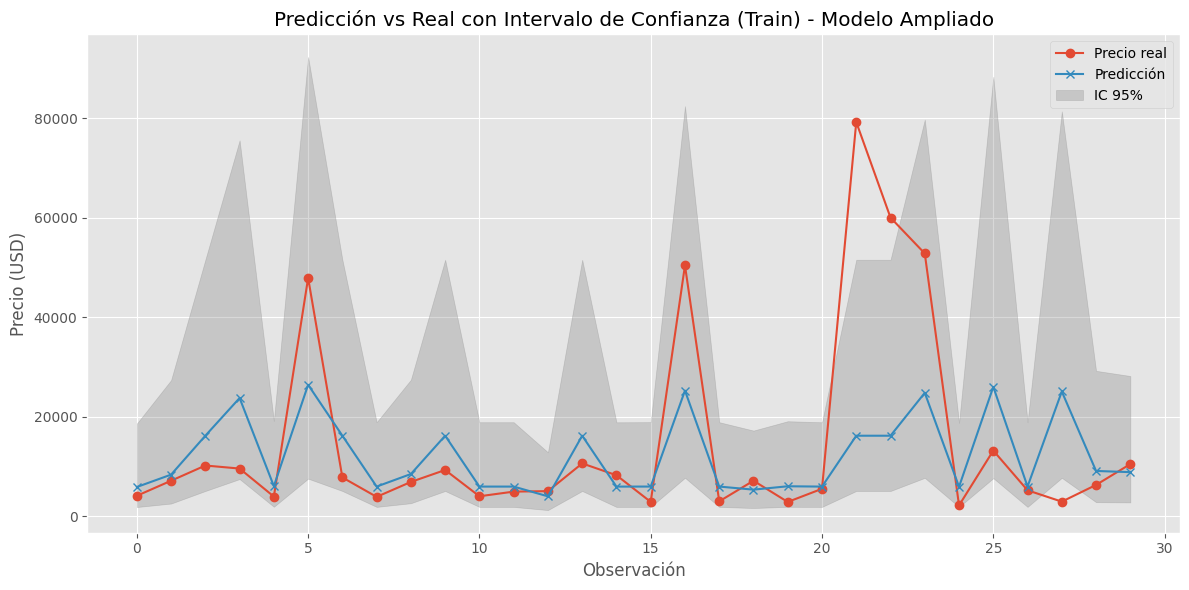

In [670]:
# Predicciones en escala original (USD) con el modelo ampliado
predicciones_int = modelo_int.get_prediction(exog=X_train_int).summary_frame(alpha=0.05).reset_index()

# Aplica la exponencial a las columnas relevantes
predicciones_int['prediccion_usd'] = np.exp(predicciones_int['mean'])
predicciones_int['ic_inf_usd'] = np.exp(predicciones_int['obs_ci_lower'])
predicciones_int['ic_sup_usd'] = np.exp(predicciones_int['obs_ci_upper'])
predicciones_int['precio_real_usd'] = np.exp(y_train.values)

# Graficar las primeras 30 observaciones
n = 30
plt.figure(figsize=(12, 6))
plt.plot(predicciones_int['precio_real_usd'][:n], label='Precio real', marker='o')
plt.plot(predicciones_int['prediccion_usd'][:n], label='Predicción', marker='x')
plt.fill_between(
    predicciones_int.index[:n],
    predicciones_int['ic_inf_usd'][:n],
    predicciones_int['ic_sup_usd'][:n],
    color='gray', alpha=0.3, label='IC 95%'
)
plt.xlabel('Observación')
plt.ylabel('Precio (USD)')
plt.title('Predicción vs Real con Intervalo de Confianza (Train) - Modelo Ampliado')
plt.legend()
plt.tight_layout()
plt.show()